In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
cimg_ref = np.load('npy_data/ESE/grid/cimg_max_05_oa_0.npy')
cimg_oa1_02 = np.load('npy_data/ESE/zscan/dim4_dm0_grid0/oa_1/cimg_max_sigma_020_1.npy')
cimg_oa0_02 = np.load('npy_data/ESE/zscan/dim4_dm0_grid0/oa_0/cimg_max_sigma_020_1.npy')
cimg_oa2_02 = np.load('npy_data/ESE/zscan/dim4_dm0_grid0/oa_2/cimg_max_sigma_020_1.npy')

In [3]:
# for normalization
ref_max = np.abs(cimg_ref).max()
cimg_ref = cimg_ref / ref_max
cimg_oa1_02 = cimg_oa1_02 / ref_max
cimg_oa0_02 = cimg_oa0_02 / ref_max
cimg_oa2_02 = cimg_oa2_02 / ref_max

In [17]:
np.where(cimg_ref == np.abs(cimg_ref).min())

(array([39]), array([0]))

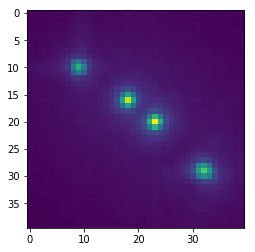

In [9]:
plt.imshow(cimg_ref)

In [19]:
print('ref min value : {}'.format(cimg_ref[39, 0]))
print('oa0 min value : {}'.format(cimg_oa1_02[39, 0]))
print('oa1 min value : {}'.format(cimg_oa1_02[39, 0]))

ref min value : 0.005426144151148898
oa0 min value : 0.0
oa1 min value : 0.0


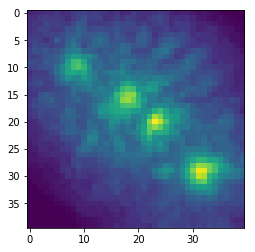

In [20]:
cimg_oa1_02 = np.load('npy_data/ESE/zscan/dim4_dm0_grid0/oa_1/cimg_max_sigma_020_1.npy')
plt.imshow(cimg_oa1_02)

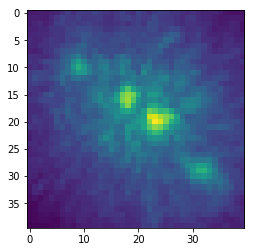

In [22]:
cimg_oa0_02 = np.load('npy_data/ESE/zscan/dim4_dm0_grid0/oa_0/cimg_max_sigma_020_1.npy')
plt.imshow(cimg_oa0_02)

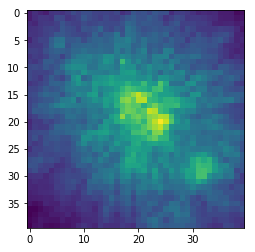

In [23]:
cimg_oa0_03 = np.load('npy_data/ESE/zscan/dim4_dm0_grid0/oa_0/cimg_max_sigma_030_1.npy')
plt.imshow(cimg_oa0_03)

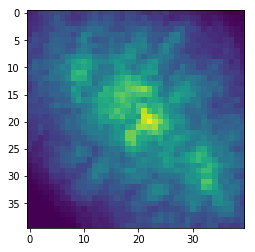

In [24]:
cimg_oa1_03 = np.load('npy_data/ESE/zscan/dim4_dm0_grid0/oa_1/cimg_max_sigma_030_1.npy')
plt.imshow(cimg_oa1_03)

## Histogram

In [6]:
# check the max of the first column
print('oa0 max : {}'.format(cimg_oa0_02[:, 0].max()))
print('oa1 max : {}'.format(cimg_oa1_02[:, 0].max()))
print('oa2 max : {}'.format(cimg_oa2_02[:, 0].max()))

oa0 max : 0.04377923450505796
oa1 max : 0.027039781277083102
oa2 max : 0.014432506355553052


In [39]:
# histogram setting
n_bins = 20
xmax = 0.045 # from oa0 max
dx = xmax / n_bins

In [31]:
# group values
def group_values(sorted_list, dx):    
    return dx* np.ceil(np.array(sorted_list)/dx)      

In [54]:
gouped_oa0 = group_values(cimg_oa0_02[:, 0], dx)
gouped_oa1 = group_values(cimg_oa1_02[:, 0], dx)
gouped_oa2 = group_values(cimg_oa2_02[:, 0], dx)
gouped_oa2

array([0.00225, 0.00225, 0.00225, 0.00675, 0.00675, 0.009  , 0.01125,
       0.01125, 0.01125, 0.01125, 0.0135 , 0.01575, 0.01575, 0.01575,
       0.01125, 0.01125, 0.009  , 0.00675, 0.0045 , 0.0045 , 0.0045 ,
       0.00225, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     ])

In [62]:
# count number of elements
def generate_histogram(gouped_vals, dx, n_bins):
    output = np.zeros((n_bins, 2))
    for idx in range(n_bins):
        curr_val = dx* idx
        output[idx, 0] = curr_val
        n_element = 0
        for curr_elem in gouped_vals:
            if curr_elem == curr_val:
                n_element += 1
        output[idx, 1] = int(n_element)
    output[:, 1] = output[:, 1].astype(int)
    return output

In [63]:
hist_oa0 = generate_histogram(gouped_oa0, dx, n_bins)
hist_oa1 = generate_histogram(gouped_oa1, dx, n_bins)
hist_oa2 = generate_histogram(gouped_oa2, dx, n_bins)

In [66]:
import tools.tex_1D_visualization as pgf1d

In [70]:
# tex visualization
# file names
path = '/Users/sayakokodera/2018_Sayako_Kodera_BA/BA/figures/pytikz/1D'
fname_oa0 = '{}/hist_oROI_oa0.tex'.format(path)
fname_oa1 = '{}/hist_oROI_oa1.tex'.format(path)
fname_oa2 = '{}/hist_oROI_oa2.tex'.format(path)
# tex file generation
pgf1d.generate_coordinates_for_scatter_plot(hist_oa0, fname_oa0)
pgf1d.generate_coordinates_for_scatter_plot(hist_oa1, fname_oa1)
pgf1d.generate_coordinates_for_scatter_plot(hist_oa2, fname_oa2)

### Test Histogram in December

Text(0.5, 1.0, 'HIstogram in non-ROI region')

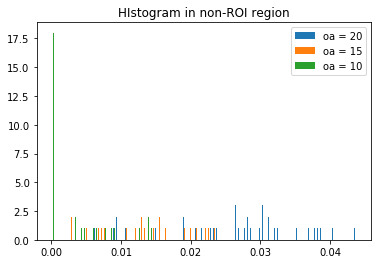

In [55]:
# histogram in Non-ROI region
n_bins = 100
# subplot
#plt.hist([cimg_ref[:, 0], cimg_oa0_02[:, 0], cimg_oa1_02[:, 0], cimg_oa2_02[:, 0]], bins=n_bins)
plt.hist([cimg_oa0_02[:, 0], cimg_oa1_02[:, 0], cimg_oa2_02[:, 0]], bins=n_bins)
#plt.legend(['ref', 'oa = 20', 'oa = 15','oa = 10' ])
plt.legend(['oa = 20', 'oa = 15', 'oa = 10'])
plt.title('HIstogram in non-ROI region')

In [57]:
import seaborn as sns

/Users/sayakokodera/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


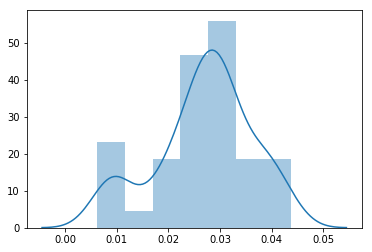

In [63]:
ax = sns.distplot(cimg_oa0_02[:, 0])

/Users/sayakokodera/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


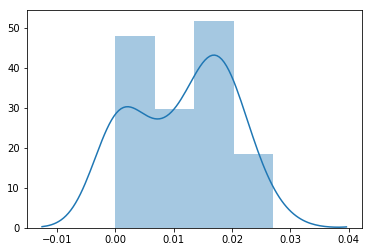

In [64]:
ax = sns.distplot(cimg_oa1_02[:, 0])

/Users/sayakokodera/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


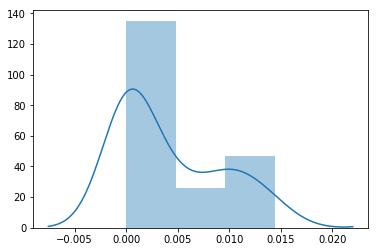

In [65]:
ax = sns.distplot(cimg_oa2_02[:, 0])